In [ ]:
import pandas as pd
import numpy as np

# Create a simple MFCC-like dataset
np.random.seed(42)

emotions = ["happy", "sad", "angry"]
data = {
    "mfcc1": np.random.uniform(-20, 20, 150),
    "mfcc2": np.random.uniform(-30, 30, 150),
    "mfcc3": np.random.uniform(-25, 25, 150),
    "mfcc4": np.random.uniform(-15, 15, 150),
    "mfcc5": np.random.uniform(-10, 10, 150),
    "emotion": np.repeat(emotions, 50)
}

df = pd.DataFrame(data)
df.to_csv("emotion_dataset.csv", index=False)

print("Dataset created as emotion_dataset.csv")
df.head()


Dataset created as emotion_dataset.csv


,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,emotion
0,-5.018395,24.495953,-22.415914,8.314407,-6.621299,happy
1,18.028572,-15.626287,1.567732,1.752127,-4.428193,happy
2,9.279758,-21.306308,2.031756,-2.273340,-6.459790,happy
3,3.946339,-0.632834,6.871495,12.190632,-8.225949,happy
4,-13.759254,29.139027,11.304567,-11.664076,-7.587283,happy


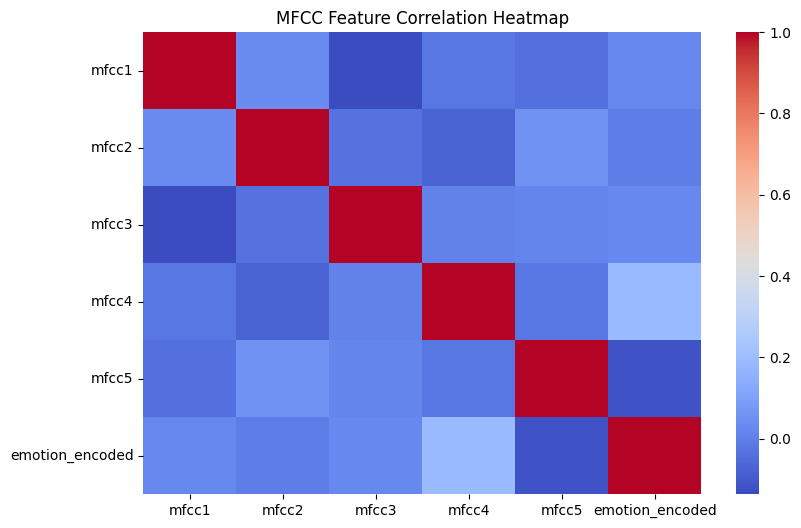

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.2849 - loss: 1.4990 - val_accuracy: 0.5000 - val_loss: 1.0687
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4435 - loss: 1.2196 - val_accuracy: 0.5000 - val_loss: 1.0775
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4218 - loss: 1.1807 - val_accuracy: 0.5000 - val_loss: 1.0815
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4628 - loss: 1.1761 - val_accuracy: 0.5000 - val_loss: 1.0854
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4304 - loss: 1.1480 - val_accuracy: 0.4444 - val_loss: 1.0871
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4598 - loss: 1.0891 - val_accuracy: 0.4444 - val_loss: 1.0906
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4316 - loss: 1.1241 - val_accuracy: 0.3889 - val_loss: 1.0938
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3597 - loss: 1.1477 - val_accuracy: 0.3889 - val_loss: 1.1026


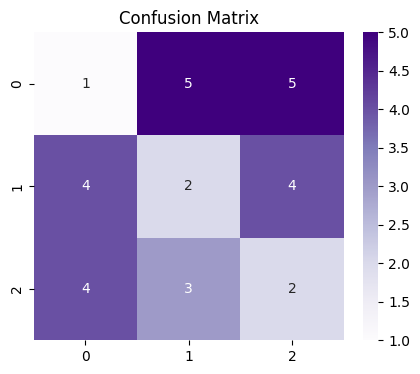


Sample Prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Predicted Emotion: happy


In [ ]:

# TASK 2 : EMOTION RECOGNITION FROM SPEECH


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# LOAD DATA
df = pd.read_csv("emotion_dataset.csv")
df.head()

#  ENCODING
le = LabelEncoder()
df["emotion_encoded"] = le.fit_transform(df["emotion"])

X = df.drop(["emotion", "emotion_encoded"], axis=1)
y = df["emotion_encoded"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# HEATMAP
plt.figure(figsize=(9,6))
sns.heatmap(df.drop("emotion", axis=1).corr(), annot=False, cmap="coolwarm")
plt.title("MFCC Feature Correlation Heatmap")
plt.show()

#  MODEL
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(len(df["emotion"].unique()), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=40, batch_size=16,
    validation_split=0.15,
    verbose=1
)

# EVALUATION
y_pred = np.argmax(model.predict(X_test), axis=1)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Purples", fmt='d')
plt.title("Confusion Matrix")
plt.show()

# SAMPLE PREDICTION
print("\nSample Prediction:")
sample = X_test[0].reshape(1, -1)
predicted = le.classes_[model.predict(sample).argmax()]
print("Predicted Emotion:", predicted)
